<a href="https://colab.research.google.com/github/Anupam32/Learning-and-Trading/blob/main/EMA_Crossover_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas_datareader as pdr
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#define variables
slow_period = 50
medium_period = 20
fast_period = 5
starting_balance = 100

In [3]:
#define timeperiod 
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2015, 1, 1)
years = (end - start).days / 365.25
round_year = round(years,1)

In [4]:
#load data into a pandas dataframe. Name of the dataframe is price 
price = pdr.get_data_yahoo('RELIANCE.NS', start, end)

In [5]:
#drop redundant columns
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], 1)
price

,Open,Close
Date,,
2014-01-01,444.511475,440.227081
2014-01-02,439.682251,433.391876
2014-01-03,431.707855,428.067352
2014-01-06,427.002441,423.460999
2014-01-07,423.287659,417.096344
...,...,...
2014-12-29,440.078491,444.288574
2014-12-30,444.338104,435.942688
2014-12-31,435.868408,441.391052


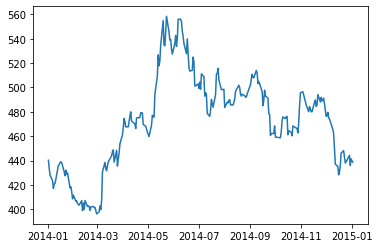

In [6]:
#plot chart 
plt.plot(price.Close)
plt.show()

In [7]:
#calculate daily return 

#create a new column within the price dataframe 
#price['daily_return'] = price.Close / price.Open

#find the balance at the end of the period assuming no trading - buy at start and hold till end 
#price['benchmark_balance'] = starting_balance * price.daily_return.cumprod()

#calculating benchmark returns from start to end 
benchmark_return = round((price.Close[-1] / price.Close[0] - 1) * 100, 2)
print(benchmark_return)

#calculating the benchmark CAGR returns - ** means to the power of
benchmark_cagr = round(((price.Close[-1] / price.Close[0]) ** (1/years) - 1) * 100, 2)
print(benchmark_cagr)


-0.37
-0.37


In [8]:
#calculating moving average
#price['Slow_SMA'] = price.Close.rolling(window = slow_period).mean()
#price['Fast_SMA'] = price.Close.rolling(window = fast_period).mean()
#price.tail()

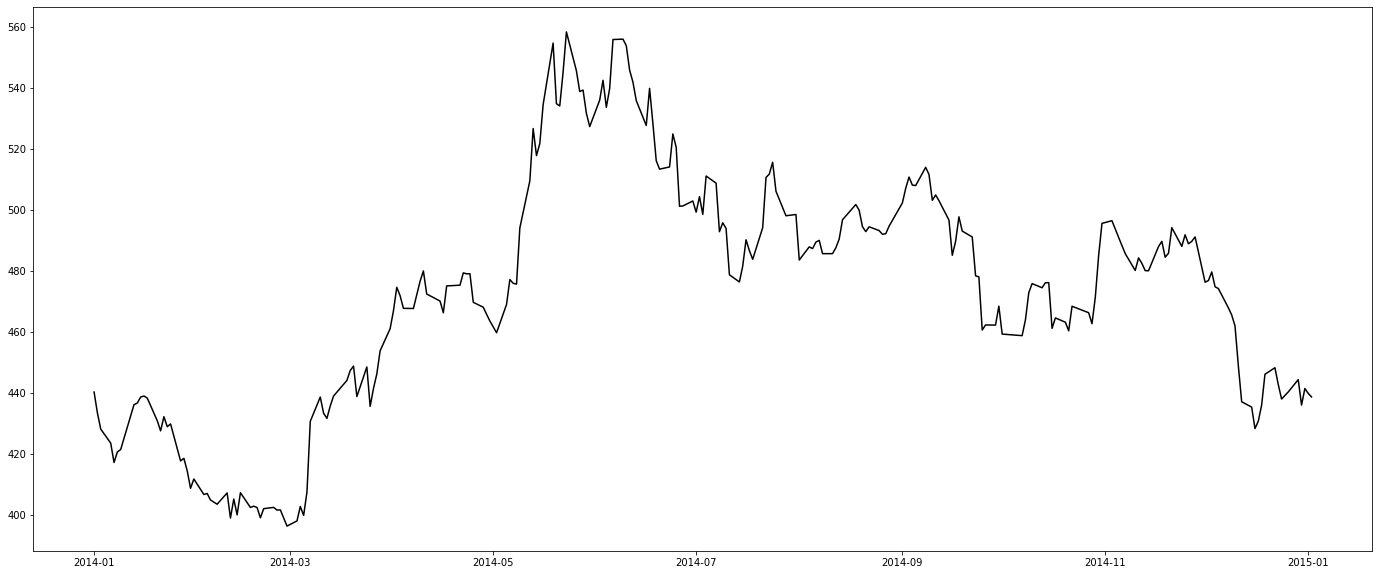

In [9]:
#plot chart with MA overlaid
plt.figure(figsize = (24,10))
plt.plot(price.Close, color = 'black')
#plt.plot(price.Slow_SMA, color = 'blue')
#plt.plot(price.Fast_SMA, color = 'red')
plt.show()

In [10]:
#calculate the 3 emas 

#calculate the fast EMA
price['fast_ema'] = price.Close.ewm(span = fast_period, adjust = False).mean()
FastEMA = price.Close.ewm(span = fast_period, adjust = False).mean()

#calculate the med EMA
price['med_ema'] = price.Close.ewm(span = medium_period, adjust = False).mean()
Medium_EMA = price.Close.ewm(span = medium_period, adjust = False).mean()

#calculate the slow EMA
price['slow_ema'] = price.Close.ewm(span = slow_period, adjust = False).mean()
SlowEMA = price.Close.ewm(span = slow_period, adjust = False).mean()

price.tail()

,Open,Close,fast_ema,med_ema,slow_ema
Date,,,,,
2014-12-29,440.078491,444.288574,441.986979,451.475686,465.282664
2014-12-30,444.338104,435.942688,439.972216,449.996353,464.132076
2014-12-31,435.868408,441.391052,440.445161,449.176801,463.240272
2015-01-01,438.988831,439.781311,440.223878,448.281992,462.320312
2015-01-02,439.880371,438.617340,439.688365,447.361549,461.390784


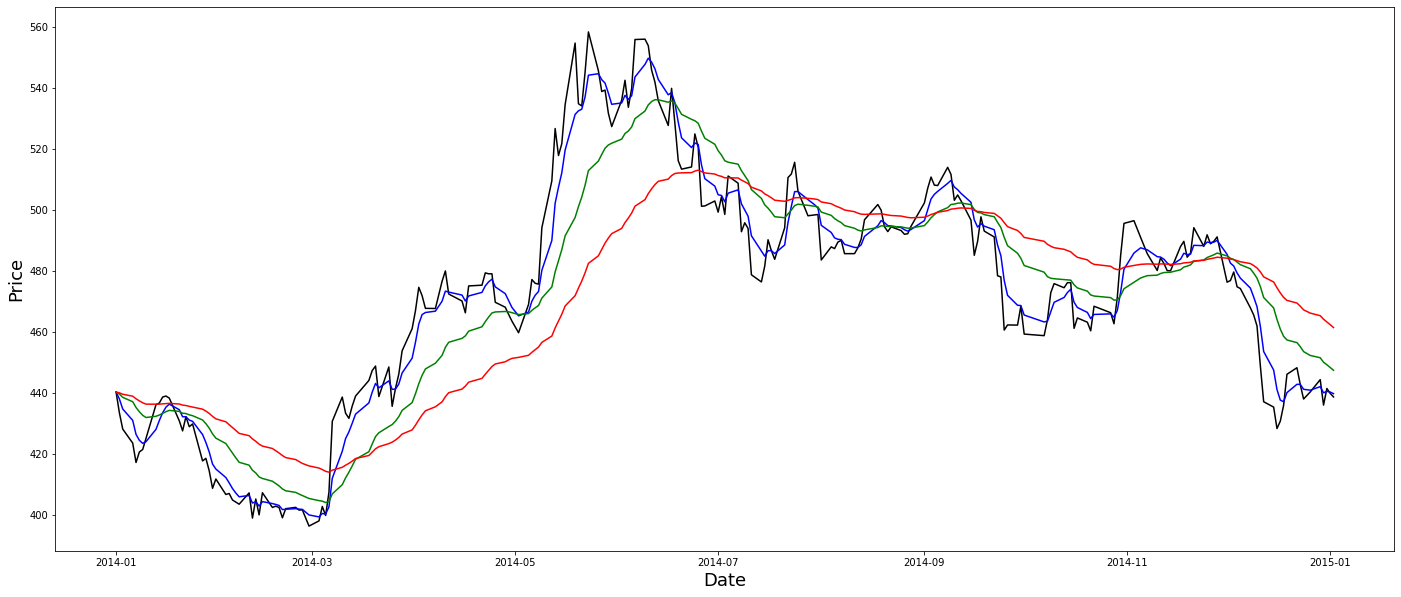

In [11]:
#plot the EMAs 
plt.figure(figsize = (24,10))
plt.plot(price.Close, label = 'Close', color = 'black')
plt.plot(FastEMA, color = 'blue')
plt.plot(Medium_EMA, color = 'green')
plt.plot(SlowEMA, color = 'red')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.show()

In [12]:
#create the function to buy and sell the stock - the function is buy_sell_function
def buy_sell_function(data):
  #create empty buy and sell lists 
  buy_list = []
  sell_list = []
  #create flags which will tell us which part of the strategy we are in
  flag_long = False 
  flag_short = False
#buying when the FastEMA crosses below the MedEMA
  for i in range(0, len(data)):
    if data['fast_ema'][i] > data['med_ema'][i] and flag_long == False:
      buy_list.append(data['fast_ema'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['fast_ema'][i] < data['med_ema'][i]:
      sell_list.append(data['fast_ema'][i])
      buy_list.append(np.nan)
      flag_long = False 
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
      
  return (buy_list, sell_list)


In [13]:
#add the buy and sell signals to the data set 
price['Buy_Indicator'] = buy_sell_function(price)[0]
price['Sell_Indicator'] = buy_sell_function(price)[1]

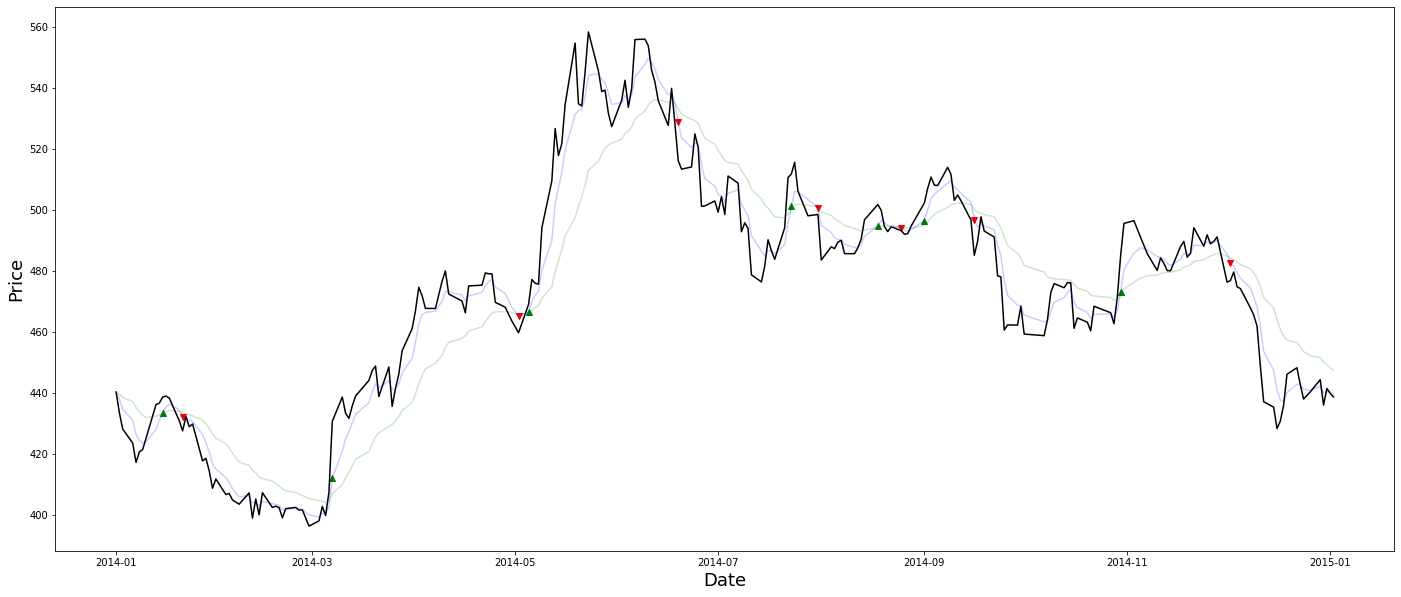

,Open,Close,fast_ema,med_ema,slow_ema,Buy_Indicator,Sell_Indicator
Date,,,,,,,
2014-08-04,485.894196,487.875427,492.590359,498.210706,502.035451,NaN,NaN
2014-08-05,487.924957,487.305817,490.828845,497.172146,501.457818,NaN,NaN
2014-08-06,487.825897,489.435638,490.364443,496.435335,500.986360,NaN,NaN
2014-08-07,489.856659,490.005249,490.244712,495.822946,500.555728,NaN,NaN
2014-08-08,485.176025,485.646545,488.711989,494.853765,499.971055,NaN,NaN
...,...,...,...,...,...,...,...
2014-12-29,440.078491,444.288574,441.986979,451.475686,465.282664,NaN,NaN
2014-12-30,444.338104,435.942688,439.972216,449.996353,464.132076,NaN,NaN
2014-12-31,435.868408,441.391052,440.445161,449.176801,463.240272,NaN,NaN


In [14]:
#plot the buy and sell signals
plt.figure(figsize = (24,10))
plt.plot(price.Close, label = 'Close', color = 'black')
plt.plot(FastEMA, color = 'blue', alpha = 0.2)
plt.plot(Medium_EMA, color = 'green', alpha = 0.2)
#plt.plot(SlowEMA, color = 'red')
plt.scatter(price.index, price['Buy_Indicator'], color = 'green', marker = '^')
plt.scatter(price.index, price['Sell_Indicator'], color = 'red', marker = 'v')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.show()
price.tail(100)

In [16]:
print(type(buy_sell_function))

<class 'function'>
